In [1]:
# IMPORTS
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the model
model = joblib.load('model/best_LGB_10k_Undersampled_BestParams.pkl')

# load curves
CURVES = pd.read_pickle('../data/cleaned/curves.pkl')

#full data
full_data = pd.read_csv('../data/raw/application_train.csv')



Loan Value: 1006920.0
Interest  : 40063.5


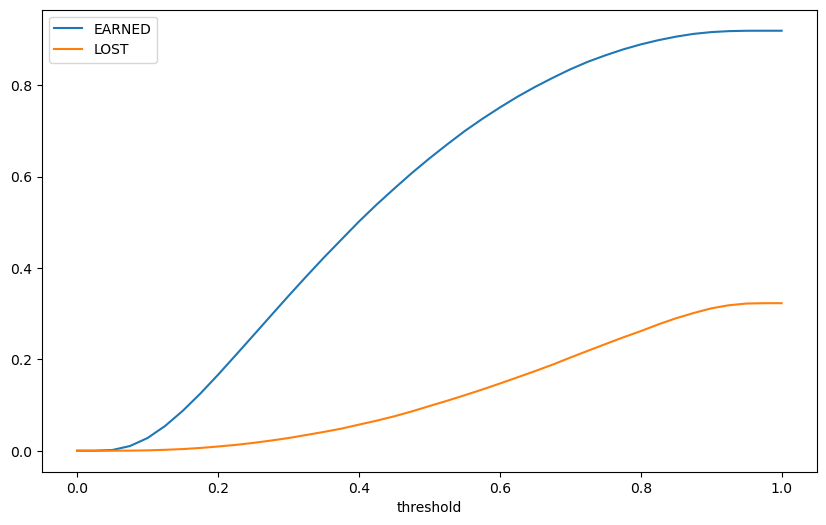

In [10]:
df_random_client = full_data.sample(n=1)

amount_loan = df_random_client.head(1)['AMT_CREDIT'].values[0]
amount_interest = df_random_client.head(1)['AMT_ANNUITY'].values[0]

print ('Loan Value:',  amount_loan)
print ('Interest  :',  amount_interest)

W0                   = amount_interest
W1                   = amount_loan

W0                   = 1
W1                   = 4


CURVES['EARNED']     = W0*CURVES.TN
CURVES['NOT_EARNED'] = W0*CURVES.FP
CURVES['LOST']       = W1*CURVES.FN
CURVES['GAIN']       = CURVES.EARNED - CURVES.LOST
CURVES['MAX_GAIN']   = CURVES.EARNED + CURVES.NOT_EARNED

fig, ax = plt.subplots(figsize =(10, 6))
ax = CURVES.plot(ax=ax, x='threshold', y=['EARNED', 'LOST'])

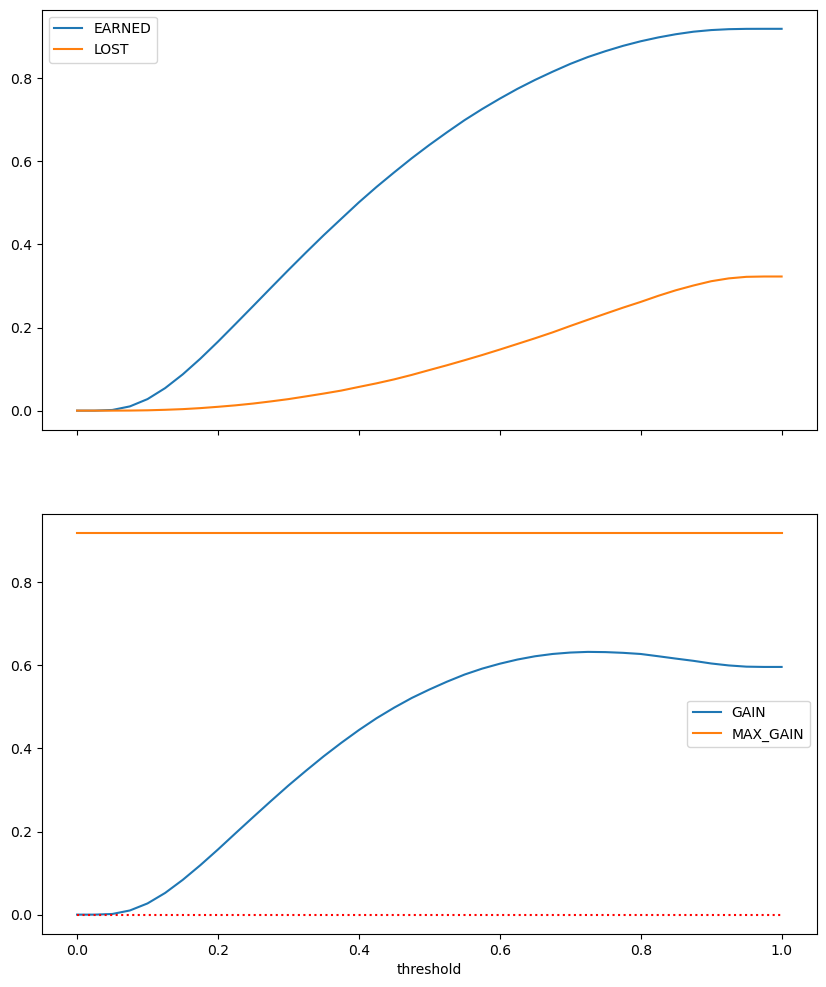

In [11]:
# NOT USED YET

fig, ax = plt.subplots(2, sharex=True, figsize =(10, 12))
CURVES.plot(ax=ax[0], x='threshold', y=['EARNED', 'LOST'])
CURVES.plot(ax=ax[1], x='threshold', y=['GAIN', 'MAX_GAIN'])
g = ax[1].plot([0,1],[0,0], 'r:')


In [5]:
import pandas as pd

In [6]:
df_amt_annuity = pd.read_pickle('../data/cleaned/df_amt_annuity.pkl')
#df_amt_annuity
#df_amt_annuity[df_amt_annuity.AMT_ANNUITY==456251]

df_amt_annuity[df_amt_annuity.index == 226060]['AMT_ANNUITY'].values[0]


33943.5

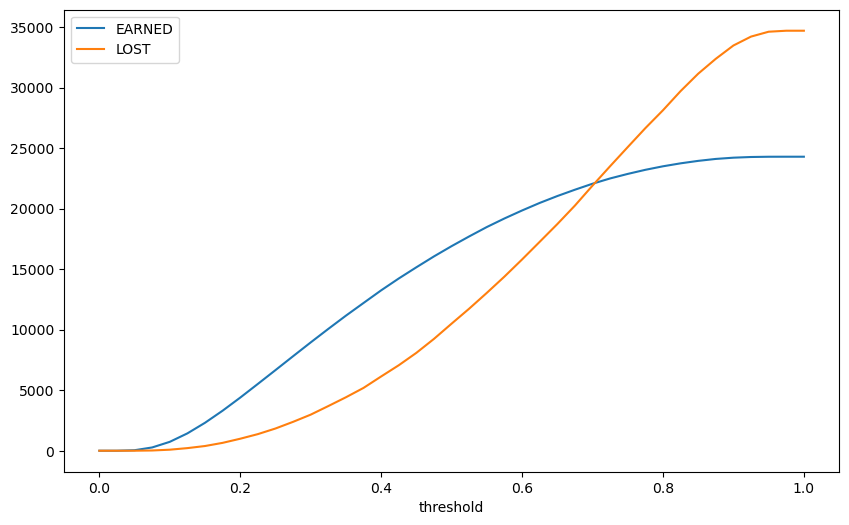

In [7]:
fig, ax = plt.subplots(figsize =(10, 6))
CURVES.plot(ax=ax, x='threshold', y=['EARNED', 'LOST'])
plt.show()

In [ ]:
def cm(y_true, y_pred, threshold =0.5):
    return confusion_matrix(
        y_true,
        y_pred>=threshold
    )
def confusion_curve(y_true, y_pred):
    return [
        cm(y_true, y_pred, thr).flatten()
        for thr in THRESHOLDS
    ]

print("Confusion matrix at 50%:\n", cm(y_true, y_pred))